In [1]:
import matplotlib.pyplot as plt
import seaborn as sns#importing python Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [17]:
#importing dataset
data = pd.read_csv('Financial_inclusion_dataset.csv')
data

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [19]:
data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [20]:
data.shape

(23524, 13)

In [21]:
data.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [22]:
#seperating into Categorical and Numerical columns
cat = data.select_dtypes(exclude = 'number')
num = data.select_dtypes(include = 'number')

display(cat.head())
display(num.head())

,country,uniqueid,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,uniqueid_1,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,uniqueid_2,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,uniqueid_3,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,uniqueid_4,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,uniqueid_5,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed


,year,household_size,age_of_respondent
0,2018,3,24
1,2018,5,70
2,2018,5,26
3,2018,5,34
4,2018,8,26


In [44]:
#Data consistency
data['education_level'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

In [24]:
data['year'].unique()

array([2018, 2016, 2017], dtype=int64)

In [25]:
data['marital_status'].unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know'], dtype=object)

In [26]:
#Encode categorical columns
from sklearn.preprocessing import LabelEncoder, StandardScaler
new_data = data.copy()
new_data.drop(['country', 'uniqueid'], axis = 1, inplace = True)
encoder = LabelEncoder()
scaler = StandardScaler()
for i in new_data.columns:
    if i in cat.columns:
        new_data[i] = encoder.fit_transform(new_data[i])
    
new_data.head()


,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,2018,1,0,1,3,24,0,5,2,3,9
1,2018,0,0,0,5,70,0,1,4,0,4
2,2018,1,1,1,5,26,1,3,3,5,9
3,2018,0,0,1,5,34,0,1,2,2,3
4,2018,0,1,0,8,26,1,0,3,2,5


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

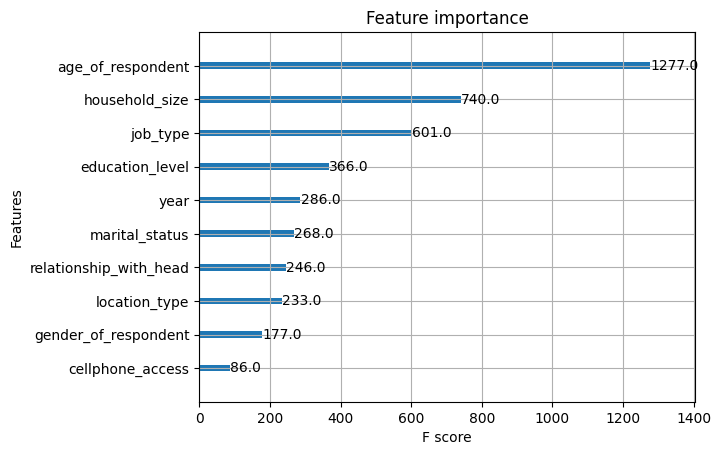

In [27]:
#Feature Selection
import xgboost as xgb
model = xgb.XGBClassifier()
x = new_data.drop('bank_account', axis = 1)
y = new_data['bank_account']
model.fit(x, y)

xgb.plot_importance(model)

In [29]:
sel_columns = ['age_of_respondent', 'household_size', 'job_type', 'education_level', 'year', 'marital_status',
               'relationship_with_head', 'bank_account']
new_data = new_data[sel_columns]
new_data.head()

,age_of_respondent,household_size,job_type,education_level,year,marital_status,relationship_with_head,bank_account
0,24,3,9,3,2018,2,5,1
1,70,5,4,0,2018,4,1,0
2,26,5,9,5,2018,3,3,1
3,34,5,3,2,2018,2,1,0
4,26,8,5,2,2018,3,0,0


<Axes: xlabel='bank_account', ylabel='count'>

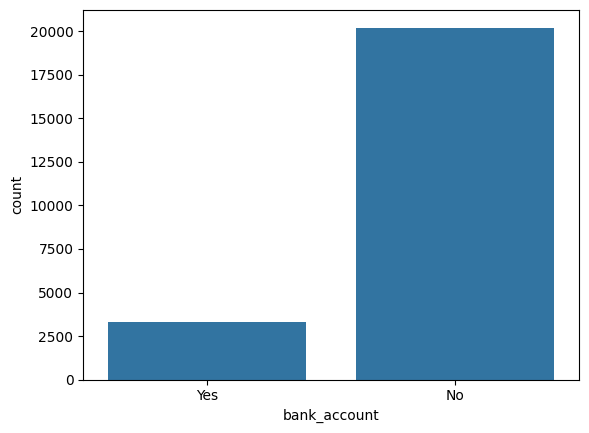

In [37]:
#Data modelling
sns.countplot(x = data['bank_account'])

<Axes: xlabel='bank_account', ylabel='count'>

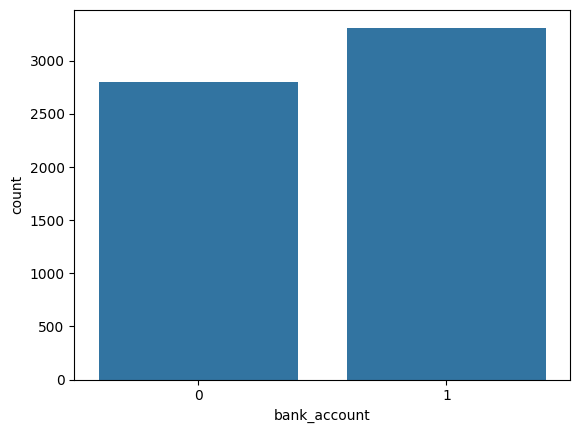

In [38]:
#undersampling
class_0 = new_data.loc[new_data['bank_account'] == 0]
class_1 = new_data.loc[new_data['bank_account'] == 1]
new_class_0 = class_0.sample(2800)

new_data = pd.concat([new_class_0, class_1], axis = 0)
new_data.head()
sns.countplot(x = new_data['bank_account'])

In [39]:
#Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
x = new_data.drop('bank_account', axis = 1)
y = new_data['bank_account']
log = LogisticRegression()

xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.80, random_state = 42, stratify =y)
log.fit(xtrain, ytrain)
ypred = log.predict(xtrain)
print(classification_report(ypred, ytrain))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      2212
           1       0.73      0.72      0.72      2677

    accuracy                           0.70      4889
   macro avg       0.70      0.70      0.70      4889
weighted avg       0.70      0.70      0.70      4889



In [40]:
#Predicting the test
log.fit(xtest, ytest)
test = log.predict(xtest)
print(classification_report(test, ytest))

              precision    recall  f1-score   support

           0       0.66      0.67      0.67       550
           1       0.73      0.72      0.72       673

    accuracy                           0.70      1223
   macro avg       0.70      0.70      0.70      1223
weighted avg       0.70      0.70      0.70      1223



<Axes: >

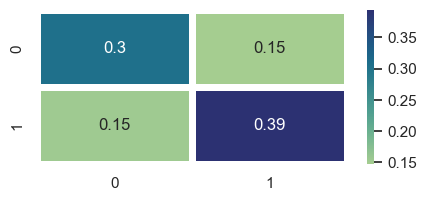

In [41]:
#Confusion Matrix
revealer = confusion_matrix(ypred, ytrain)
plt.figure(figsize = (5, 2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot = True, cmap ='crest', linewidth = 5)

<Axes: >

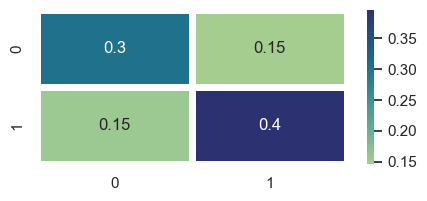

In [42]:
revealer = confusion_matrix(test, ytest)
plt.figure(figsize = (5, 2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot = True, cmap ='crest', linewidth = 5)

In [43]:
import pickle
pickle.dump(log, open('africanFinance.pkl', 'wb'))